In [1]:
#Import the drive module from Google Colab to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the pandas library for data manipulation
import pandas as pd

#Read the CSV file from your Google Drive into a pandas DataFrame
dataset = pd.read_csv("/content/drive/MyDrive/CarPrices.csv")
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


# **Dataset Overview**

In [3]:
#Get the data types of all columns in the dataset
dataset.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage(km/ltr/kg),float64
engine,float64


In [4]:
#Getting the sum of null/missing values for each column in the dataset
dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [5]:
#Checking for duplicate rows in the dataset
duplicates = dataset.duplicated()

#Sum the number of duplicate rows
duplicate_count = duplicates.sum()

#Printing the total number of duplicate rows
print(duplicate_count)

1202


In [6]:
#Generate descriptive statistics for the numerical columns in the dataset

dataset.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,1.253275e+06,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,5.545856e+07,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,0.000000e+00,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.547492e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,5.000000e+09,2.360457e+06,42.000000,3604.000000,14.000000


# **Handling Duplicate Rows**

In [7]:
#Removing duplicate rows from the dataset
dataset_without_duplicates = dataset.drop_duplicates()

In [8]:
#Checking for duplicate rows in the dataset
duplicates = dataset_without_duplicates.duplicated()

#Sum the number of duplicate rows
duplicate_count = duplicates.sum()

#Printing the total number of duplicate rows
print(duplicate_count)

0


# **Handling Outliers**

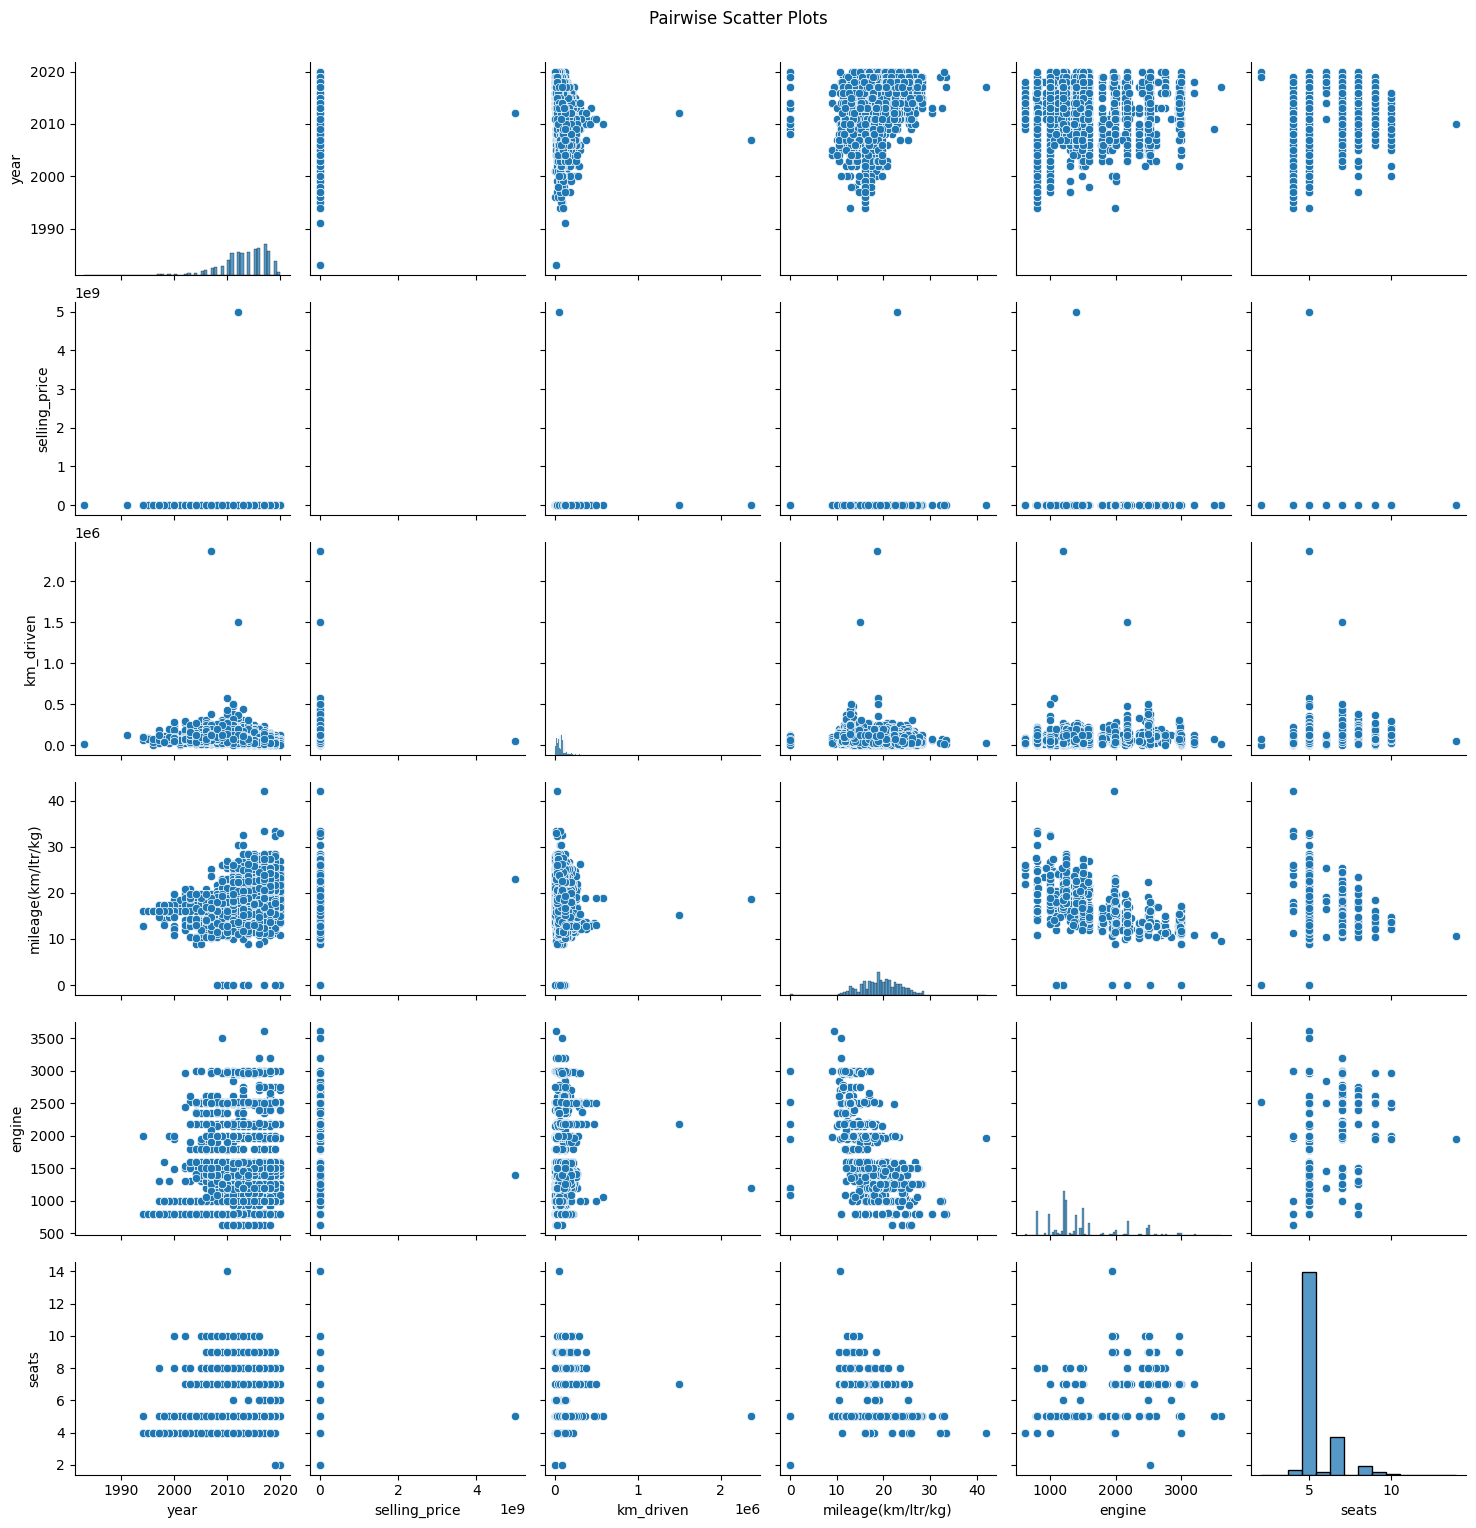

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pairwise scatter plot matrix for the dataset to check the outliers
sns.pairplot(dataset_without_duplicates)

# Add a title above the pairplot
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [9]:
import numpy as np

# Calculate the Z-score for numerical columns
numerical_cols = ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']
z_scores = np.abs((dataset_without_duplicates[numerical_cols] - dataset_without_duplicates[numerical_cols].mean()) / dataset_without_duplicates[numerical_cols].std())

# Identify outliers based on a threshold (e.g., 3)
outliers = (z_scores > 3).any(axis=1)

# Create a boolean mask to filter out outliers
mask = ~outliers

# Create a new DataFrame without outliers
new_dataset = dataset_without_duplicates[mask]

print("Shape of the original dataset:", dataset_without_duplicates.shape)
print("Shape of the dataset after removing outliers:", new_dataset.shape)

Shape of the original dataset: (6926, 12)
Shape of the dataset after removing outliers: (6595, 12)


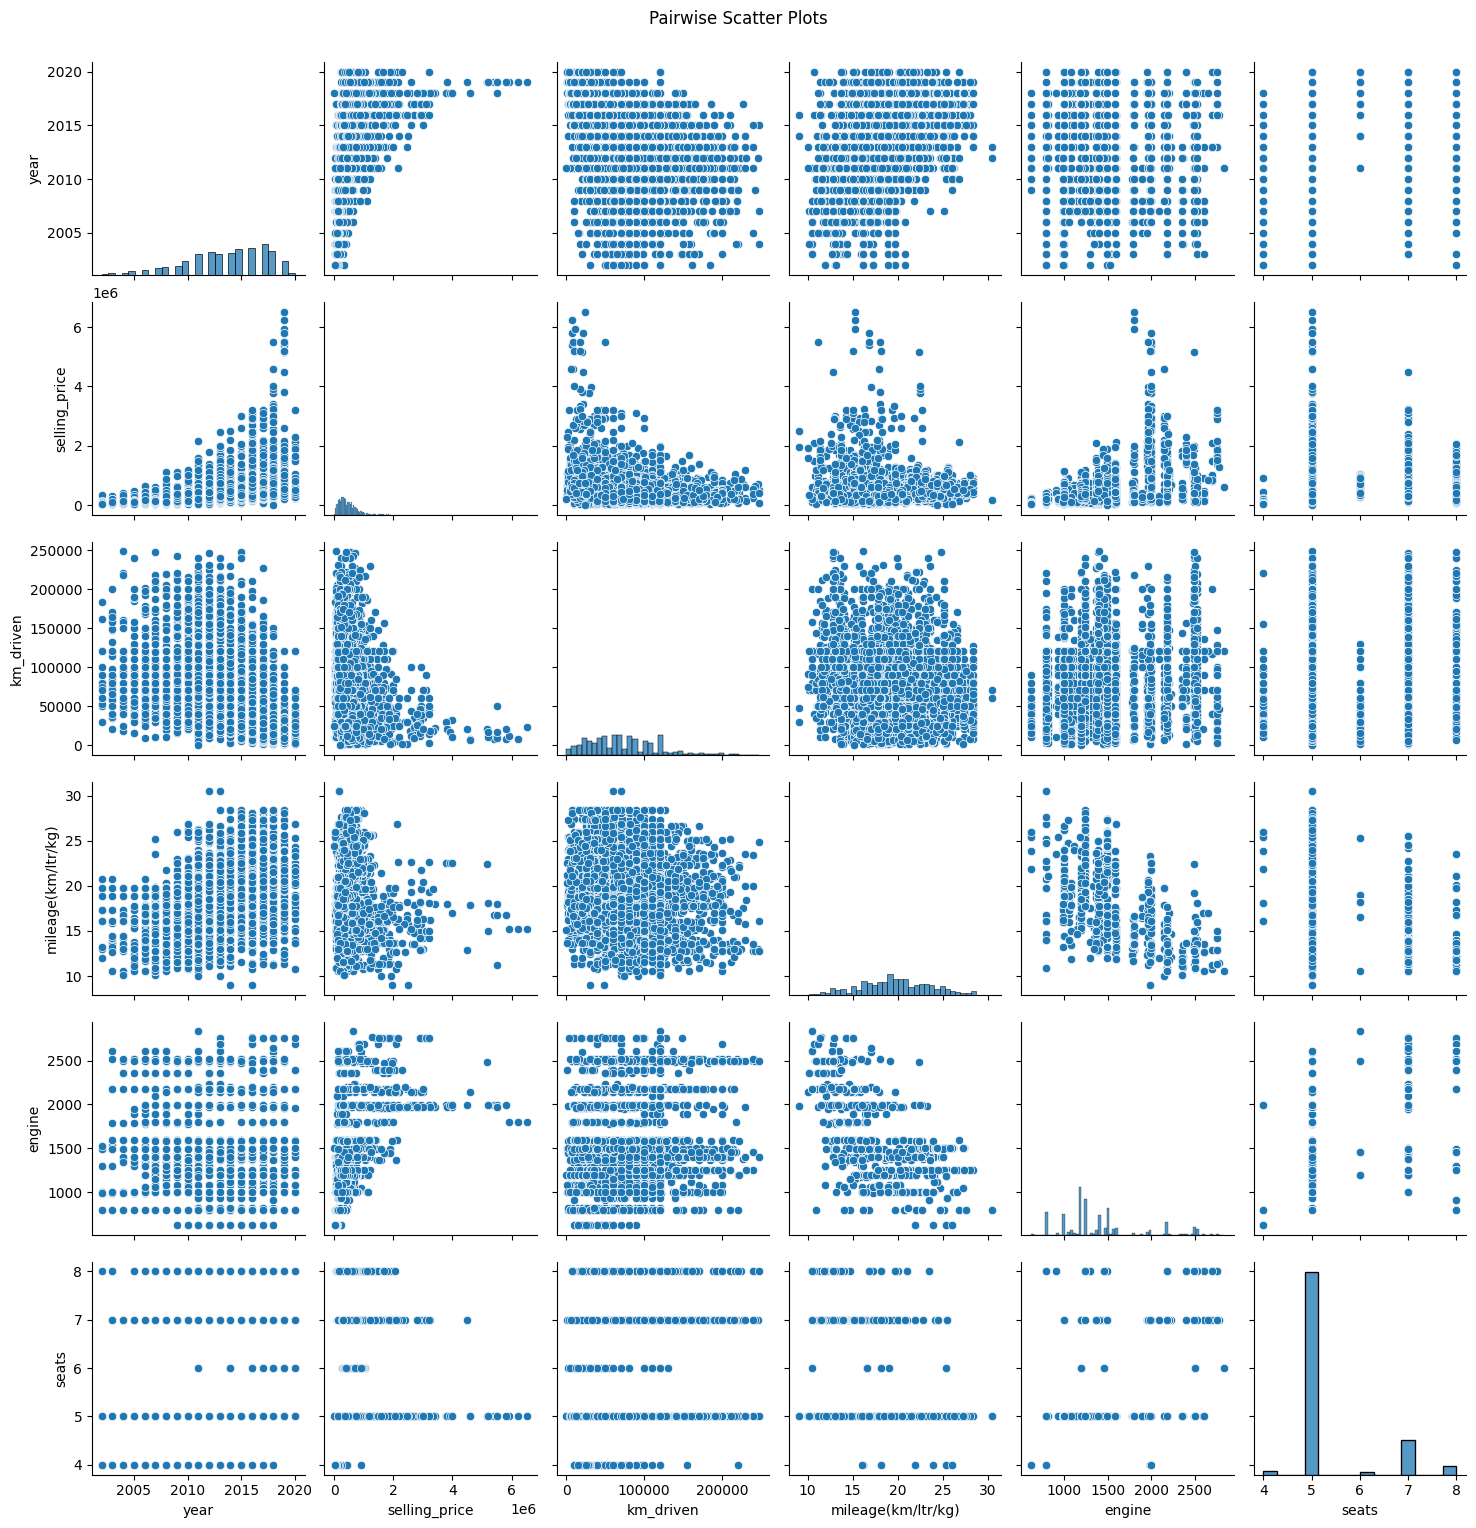

In [ ]:
# Creating a pairwise scatter plot matrix for the dataset to check the data after handling outliers
sns.pairplot(new_dataset)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [ ]:
new_dataset.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,6595.000000,6.595000e+03,6595.000000,6408.000000,6408.000000,6408.000000
mean,2013.633359,5.039448e+05,70772.266262,19.726779,1393.658864,5.366885
std,3.763349,4.553443e+05,42883.470901,3.817594,442.008839,0.852695
min,2002.000000,0.000000e+00,1.000000,9.000000,624.000000,4.000000
25%,2011.000000,2.500000e+05,37729.500000,17.010000,1197.000000,5.000000
50%,2014.000000,4.000000e+05,67000.000000,19.700000,1248.000000,5.000000
75%,2017.000000,6.300000e+05,100000.000000,22.540000,1498.000000,5.000000
max,2020.000000,6.523000e+06,248200.000000,30.460000,2835.000000,8.000000


# **Visualizing Categorical Variables and Relationships**

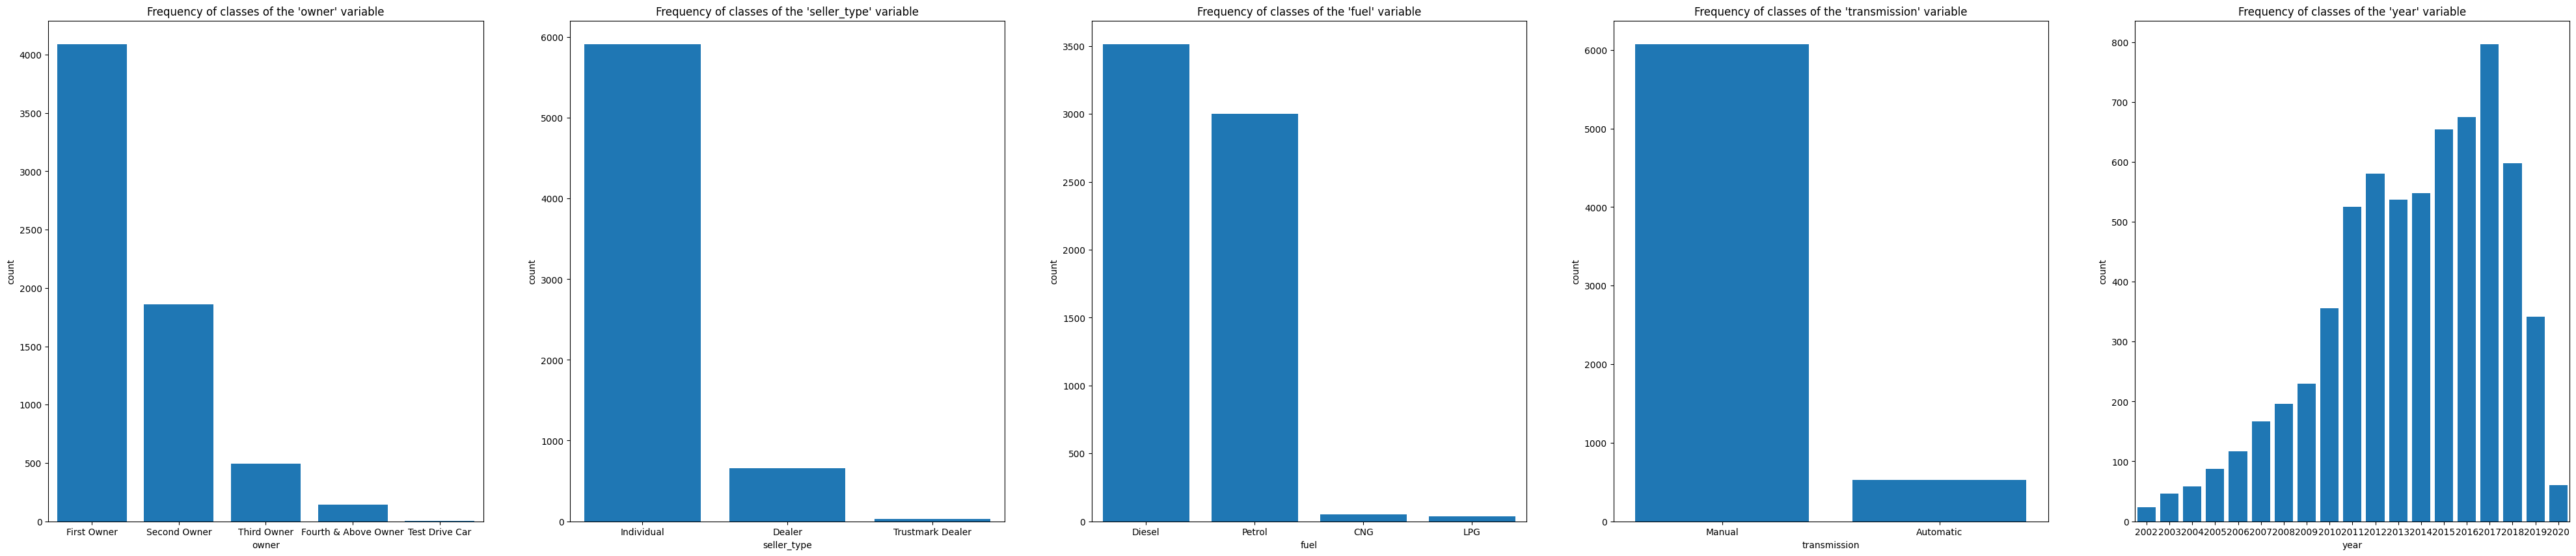

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setting up a figure with 5 subplots
fig, axes = plt.subplots(1, 5, figsize = (50, 10))

#Ploting a bar chart for the 'owner', 'seller_type', 'fuel', 'transmission' and 'year' variables
sns.barplot(ax = axes[0], x = new_dataset["owner"].value_counts().index, y = new_dataset["owner"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'owner' variable");

sns.barplot(ax = axes[1], x = new_dataset["seller_type"].value_counts().index, y = new_dataset["seller_type"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'seller_type' variable");

sns.barplot(ax = axes[2], x = new_dataset["fuel"].value_counts().index, y = new_dataset["fuel"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'fuel' variable");

sns.barplot(ax = axes[3], x = new_dataset["transmission"].value_counts().index, y = new_dataset["transmission"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'transmission' variable");

sns.barplot(ax = axes[4], x = new_dataset["year"].value_counts().index, y = new_dataset["year"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'year' variable");

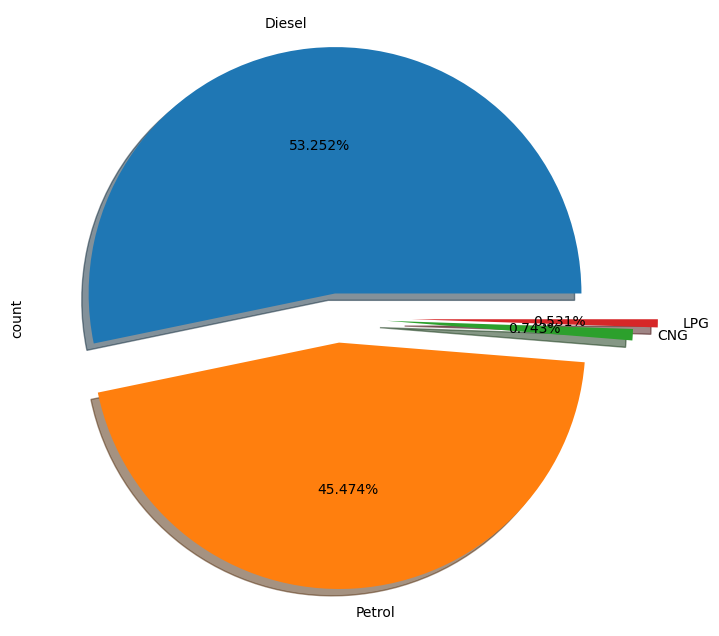

In [ ]:
#Plotting a pie chart for the 'fuel' variable
plt.figure(figsize = [8, 8], clear = True, facecolor = "#FFFFFF")
new_dataset["fuel"].value_counts().plot.pie(explode = [0.1, 0.1, 0.2, 0.3], autopct='%1.3f%%', shadow = True);

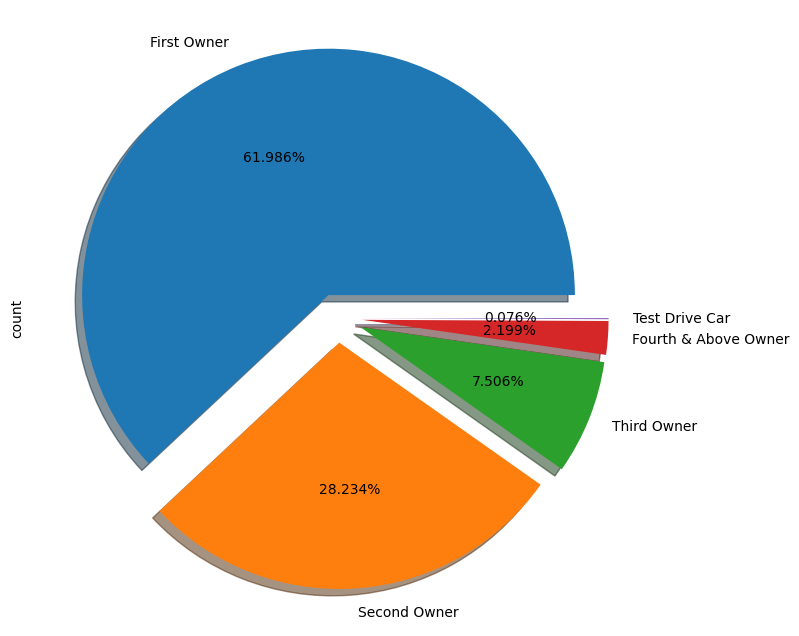

In [ ]:
#Plotting a pie chart for the 'owner' variable
plt.figure(figsize = [8, 8], clear = True, facecolor = "#FFFFFF")
new_dataset["owner"].value_counts().plot.pie(explode = [0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.3f%%', shadow = True);

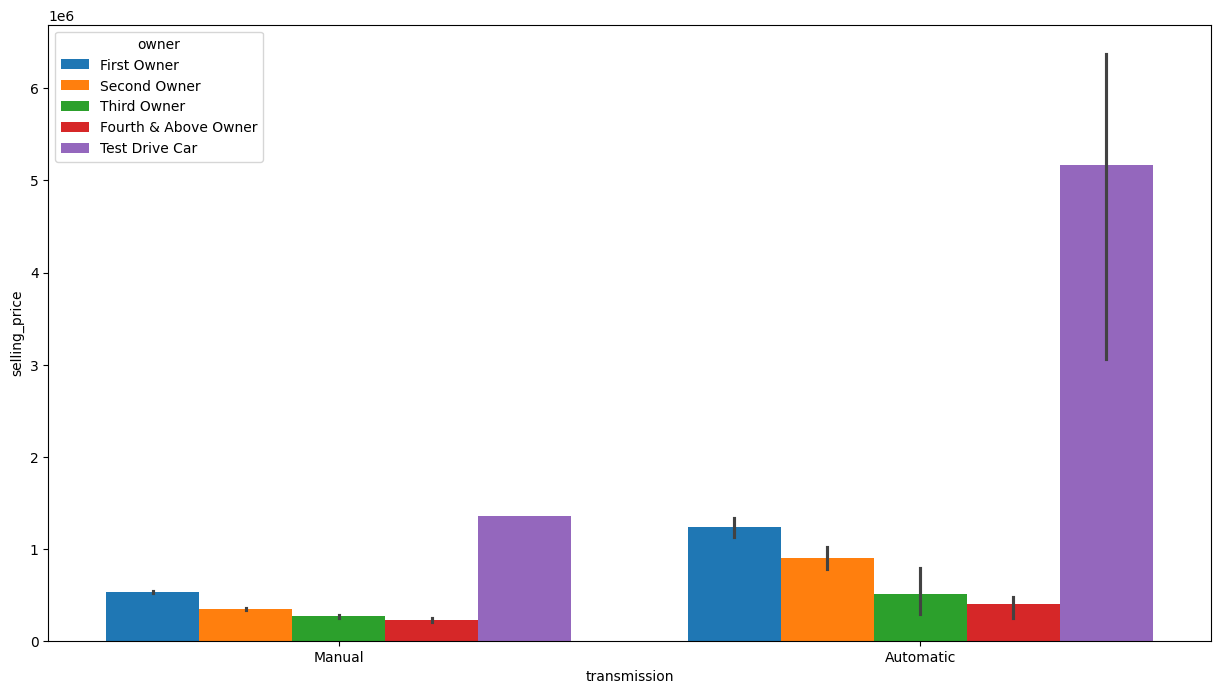

In [ ]:
#Plotting a bar chart of 'selling_price' by 'transmission' and 'owner'
plt.figure(figsize = (15, 8))
sns.barplot(x = "transmission", y = "selling_price", hue = "owner", data = new_dataset, saturation = 1);

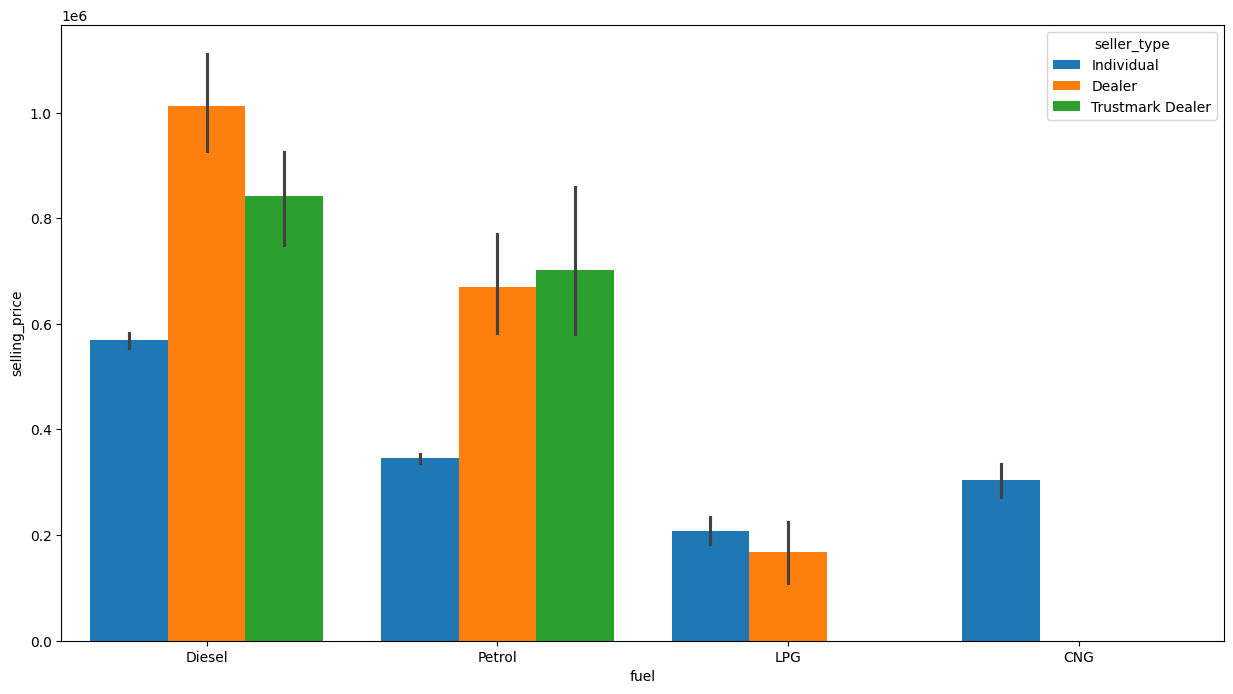

In [ ]:
#Plotting a bar chart of 'selling_price' by 'fuel' and 'seller_type'
plt.figure(figsize = (15, 8))
sns.barplot(x = "fuel", y = "selling_price", hue = "seller_type", data = new_dataset, saturation = 1);

# **Data Cleaning and Encoding Categorical Variables**

In [10]:
import numpy as np

# #Replacing empty strings in the 'max_power' column with NaN using regular expressions
new_dataset.loc[:, 'max_power'] = new_dataset['max_power'].replace(r'^\s*$', np.nan, regex=True)

# #Converting the 'max_power' column to a numeric data type, replacing remaining non-numeric values with NaN
new_dataset.loc[:, 'max_power'] = pd.to_numeric(new_dataset['max_power'], errors='coerce')

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# List of categorical columns
cat_columns = ['fuel', 'seller_type', 'owner', 'transmission']

# Fit and transform the categorical columns
encoded_columns = ohe.fit_transform(new_dataset[cat_columns])

# Get the new column names
new_column_names = ohe.get_feature_names_out(cat_columns)

# Create a new dataframe with the encoded values
encoded_df = pd.DataFrame(encoded_columns, columns=new_column_names, index=new_dataset.index)

# Drop the original categorical columns and concatenate the encoded columns
new_dataset = pd.concat([new_dataset.drop(columns=cat_columns), encoded_df], axis=1)

In [ ]:
new_dataset

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.0,5.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.0,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.0,5.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.2,5.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.90,998.0,67.1,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.54,1396.0,88.73,5.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8123,Hyundai i20 Magna,2013,320000,110000,18.50,1197.0,82.85,5.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.80,1493.0,110.0,5.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **Imputing Missing Values with Iterative Imputer**

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Store the original column names
original_columns = new_dataset.columns

# Separate the 'name' column
name_column = new_dataset['name']

# Remove the 'name' column for imputation
imputation_dataset = new_dataset.drop(columns=['name'])

# defines imputer
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10)

# fits on the dataset
imputer.fit(imputation_dataset)

# Transform the dataset (excluding 'name')
imputed_data = imputer.transform(imputation_dataset)

# Convert imputed data to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=imputation_dataset.columns, index=new_dataset.index)

# Add the 'name' column back
new_dataset = pd.concat([name_column, imputed_df], axis=1)

print(new_dataset)

                                   name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
1          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
2              Honda City 2017-2020 EXi  2006.0       158000.0   140000.0   
3             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
4                Maruti Swift VXI BSIII  2007.0       130000.0   120000.0   
...                                 ...     ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
8122         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
8123                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
8124              Hyundai Verna CRDi SX  2007.0       135000.0   119000.0   
8125             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      mileage(km/ltr/kg)  engine  max_power  seats  fuel_CNG  fuel_Diesel  

In [13]:
new_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
mileage(km/ltr/kg),0
engine,0
max_power,0
seats,0
fuel_CNG,0
fuel_Diesel,0


# **Separating the Target Variable and Feature Variables**

In [14]:
Y = new_dataset['selling_price']
X = new_dataset.drop(['selling_price','name'],axis=1)
X

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Automatic,transmission_Manual
0,2014.0,145500.0,23.40,1248.0,74.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014.0,120000.0,21.14,1498.0,103.52,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2006.0,140000.0,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2010.0,127000.0,23.00,1396.0,90.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2007.0,120000.0,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013.0,50000.0,18.90,998.0,67.10,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8122,2014.0,80000.0,22.54,1396.0,88.73,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8123,2013.0,110000.0,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8124,2007.0,119000.0,16.80,1493.0,110.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **Data Preprocessing and Model Evaluation**

In [15]:
#Import necessary libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test= train_test_split(X.values,Y, test_size=0.2, random_state= 42)

#Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (5276, 20)
Test set shape: (1319, 20)


# **Linear Model**

Mean Absolute Error: 146597.06899166034
Mean Squared Error: 76785624234.27597
Root Mean Squared Error: 277102.1909589961
R-squared: 0.5904235902007846

Cross-validation results:
MSE:
Scores: [5.80086698e+10 6.47429822e+10 2.54419197e+34 8.28156792e+10
 5.21062860e+10]
Mean: 5088383949670387932503303551713280.0000 (+/- 20353535798681549424170204993159168.0000)

RMSE:
Scores: [2.40849891e+05 2.54446423e+05 1.59505234e+17 2.87777135e+05
 2.28268014e+05]
Mean: 31901046847195820.0000 (+/- 127604187387771952.0000)


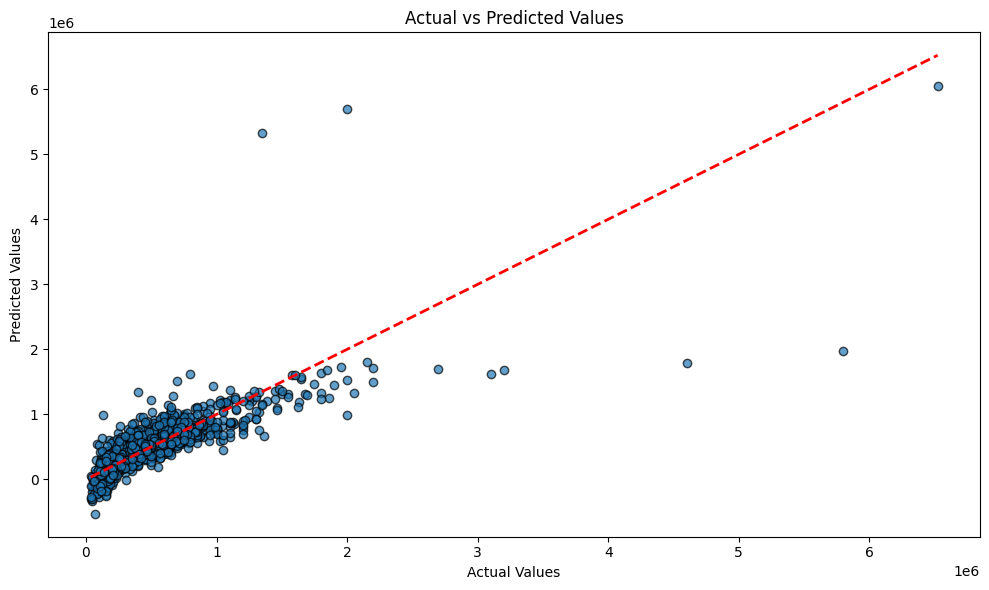

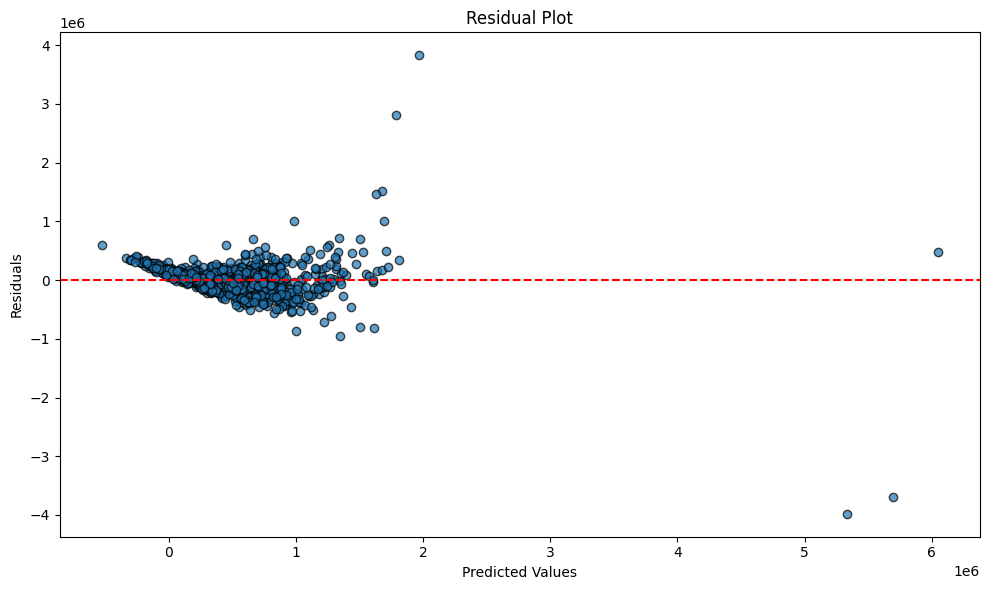

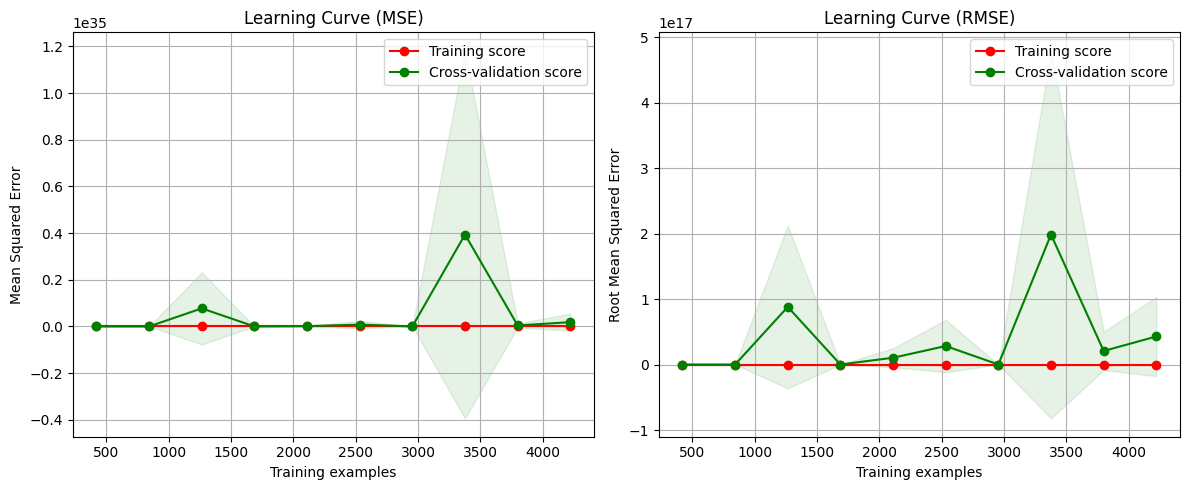

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

#Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

#Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

#Calculate evaluation metrics
linear_mae = mean_absolute_error(Y_test, y_pred)
linear_mse = mean_squared_error(Y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(Y_test, y_pred)

#Print the results
print(f"Mean Absolute Error: {linear_mae}")
print(f"Mean Squared Error: {linear_mse}")
print(f"Root Mean Squared Error: {linear_rmse}")
print(f"R-squared: {linear_r2}")

#Cross-validation
#The scoring metric is negative MSE, so i will negate it in the next step to get actual MSE
cv_scores = cross_val_score(linear_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores #Converting scores to MSE by negating
cv_rmse = np.sqrt(cv_mse) #Calculating RMSE by taking square root of MSE

print("\nCross-validation results:")
print("MSE:")
print(f"Scores: {cv_mse}")
print(f"Mean: {cv_mse.mean():.4f} (+/- {cv_mse.std() * 2:.4f})")

print("\nRMSE:")
print(f"Scores: {cv_rmse}")
print(f"Mean: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Add Residual Plot
residuals = Y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


#learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

#Calculate MSE
train_mse_mean = -train_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
test_mse_mean = -test_scores.mean(axis=1)
test_mse_std = test_scores.std(axis=1)

#Calculate RMSE
train_rmse_mean = np.sqrt(train_mse_mean)
train_rmse_std = np.sqrt(train_mse_std)
test_rmse_mean = np.sqrt(test_mse_mean)
test_rmse_std = np.sqrt(test_mse_std)

#Plot
plt.figure(figsize=(12, 5))

#MSE plot
plt.subplot(1, 2, 1)
plt.title('Learning Curve (MSE)')
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.fill_between(train_sizes, train_mse_mean - train_mse_std, train_mse_mean + train_mse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mse_mean - test_mse_std, test_mse_mean + test_mse_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mse_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

#RMSE plot
plt.subplot(1, 2, 2)
plt.title('Learning Curve (RMSE)')
plt.xlabel("Training examples")
plt.ylabel("Root Mean Squared Error")
plt.grid()
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_rmse_mean - test_rmse_std, test_rmse_mean + test_rmse_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_rmse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_rmse_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# **Non-Linear Model**
**Random Forest Regressor**

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error: 74666.43869478597
Mean Squared Error: 15914008606.206495
Root Mean Squared Error: 126150.73763639473
R-squared: 0.9151142863596812

Cross-validation results:
MSE:
Scores: [2.00547362e+10 1.93842676e+10 3.79705887e+10 2.55204332e+10
 1.62549427e+10]
Mean: 23836993690.8877 (+/- 15341765632.6676)

RMSE:
Scores: [141614.74566261 139227.39542863 194860.4339856  159751.16026086
 127494.87319013]
Mean: 152589.7217 (+/- 47047.6576)


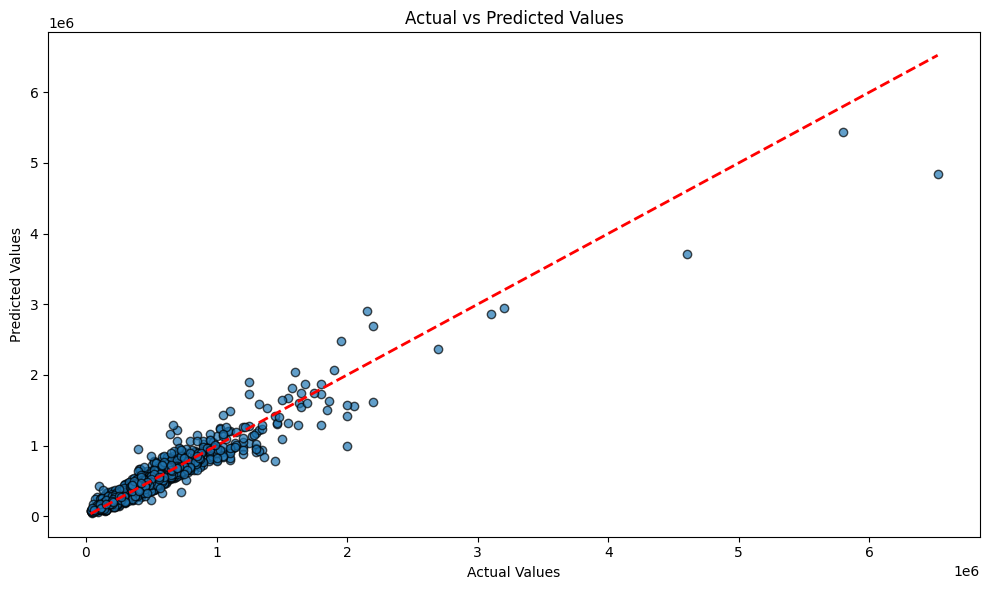

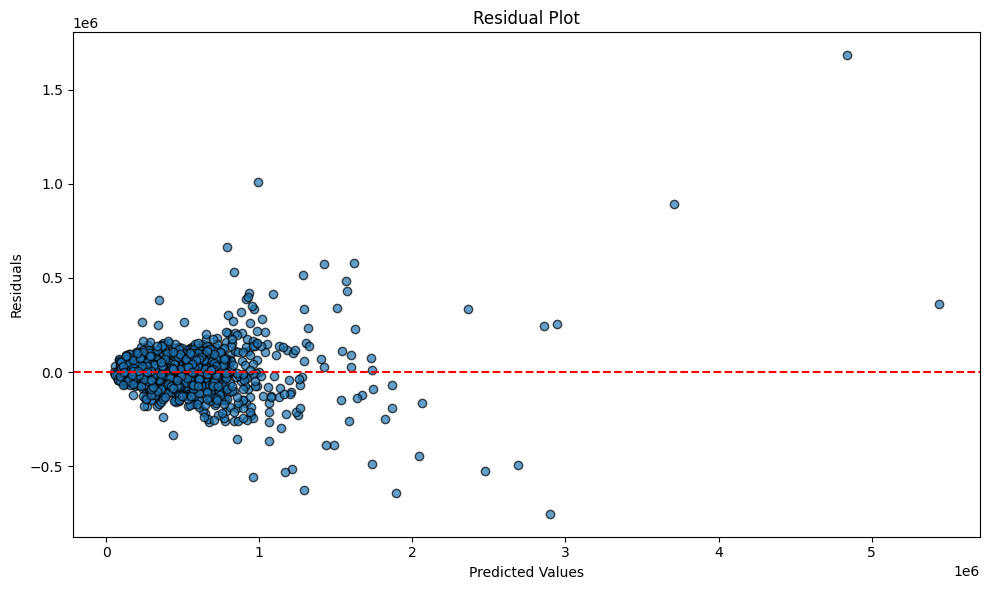

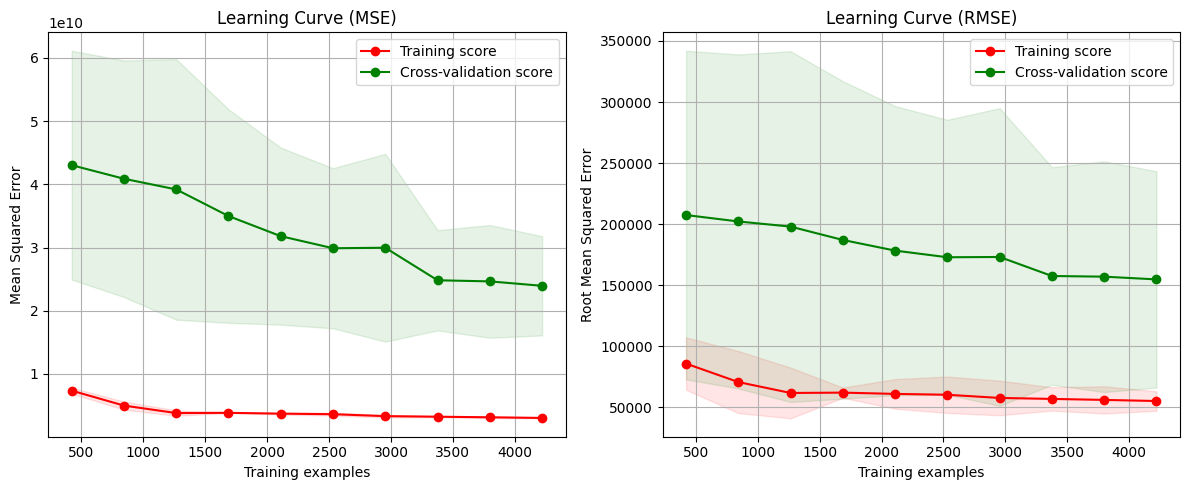

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

#Instantiate RandomForestRegressor with a fixed random state for reproducibility
random_forest = RandomForestRegressor(random_state=42)

#Instantiate GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

#Fit GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

#Getting the best model
best_rf_model = grid_search.best_estimator_

#Print the best parameters
print("Best parameters:", grid_search.best_params_)

#Make predictions using the best model
y_pred = best_rf_model.predict(X_test_scaled)

#Calculate evaluation metrics
rfr_mae = mean_absolute_error(Y_test, y_pred)
rfr_mse = mean_squared_error(Y_test, y_pred)
rfr_rmse = np.sqrt(rfr_mse)
rfr_r2 = r2_score(Y_test, y_pred)

#Print the results
print(f"Mean Absolute Error: {rfr_mae}")
print(f"Mean Squared Error: {rfr_mse}")
print(f"Root Mean Squared Error: {rfr_rmse}")
print(f"R-squared: {rfr_r2}")

#Cross-validation for the best model
#The scoring metric is negative MSE, so i will negate it in the next step to get actual MSE
cv_scores = cross_val_score(best_rf_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores #Converting scores to MSE by negating
cv_rmse = np.sqrt(cv_mse) #Calculating RMSE by taking square root of MSE

print("\nCross-validation results:")
print("MSE:")
print(f"Scores: {cv_mse}")
print(f"Mean: {cv_mse.mean():.4f} (+/- {cv_mse.std() * 2:.4f})")

print("\nRMSE:")
print(f"Scores: {cv_rmse}")
print(f"Mean: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

#Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

#Add Residual Plot
residuals = Y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

#Learning curves
train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

#Calculate MSE
train_mse_mean = -train_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
test_mse_mean = -test_scores.mean(axis=1)
test_mse_std = test_scores.std(axis=1)

#Calculate RMSE
train_rmse_mean = np.sqrt(train_mse_mean)
train_rmse_std = np.sqrt(train_mse_std)
test_rmse_mean = np.sqrt(test_mse_mean)
test_rmse_std = np.sqrt(test_mse_std)

#Plot
plt.figure(figsize=(12, 5))

#MSE plot
plt.subplot(1, 2, 1)
plt.title('Learning Curve (MSE)')
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.fill_between(train_sizes, train_mse_mean - train_mse_std, train_mse_mean + train_mse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mse_mean - test_mse_std, test_mse_mean + test_mse_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mse_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

#RMSE plot
plt.subplot(1, 2, 2)
plt.title('Learning Curve (RMSE)')
plt.xlabel("Training examples")
plt.ylabel("Root Mean Squared Error")
plt.grid()
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_rmse_mean - test_rmse_std, test_rmse_mean + test_rmse_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_rmse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_rmse_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

**Gradient Boosting Regressor**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 69155.35232508069
Mean Squared Error: 13969818007.718288
Root Mean Squared Error: 118193.98465115849
R-squared: 0.9254846468696728

Cross-validation results:
MSE:
Scores: [2.05315357e+10 1.97406439e+10 2.88384163e+10 2.25635636e+10
 1.69467125e+10]
Mean: 21724174409.4072 (+/- 7974857198.9467)

RMSE:
Scores: [143288.29588768 140501.40161698 169818.77487279 150211.72925192
 130179.53966795]
Mean: 146799.9483 (+/- 26377.9909)


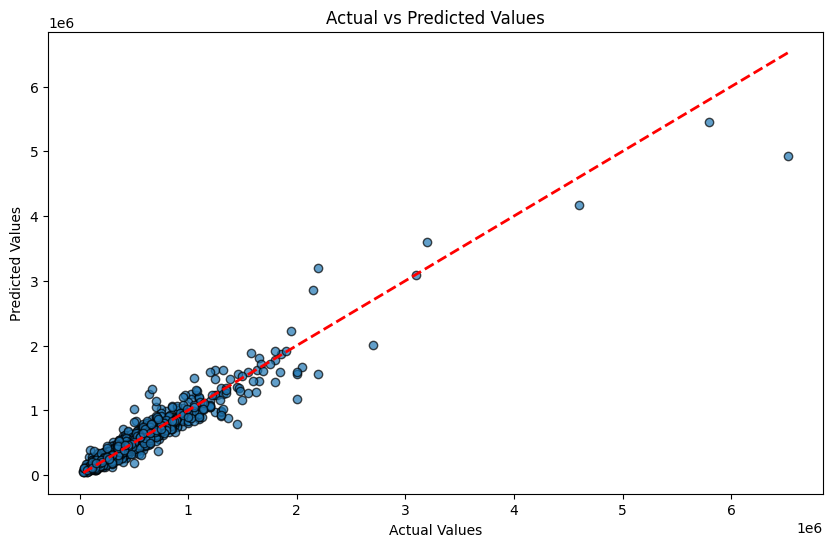

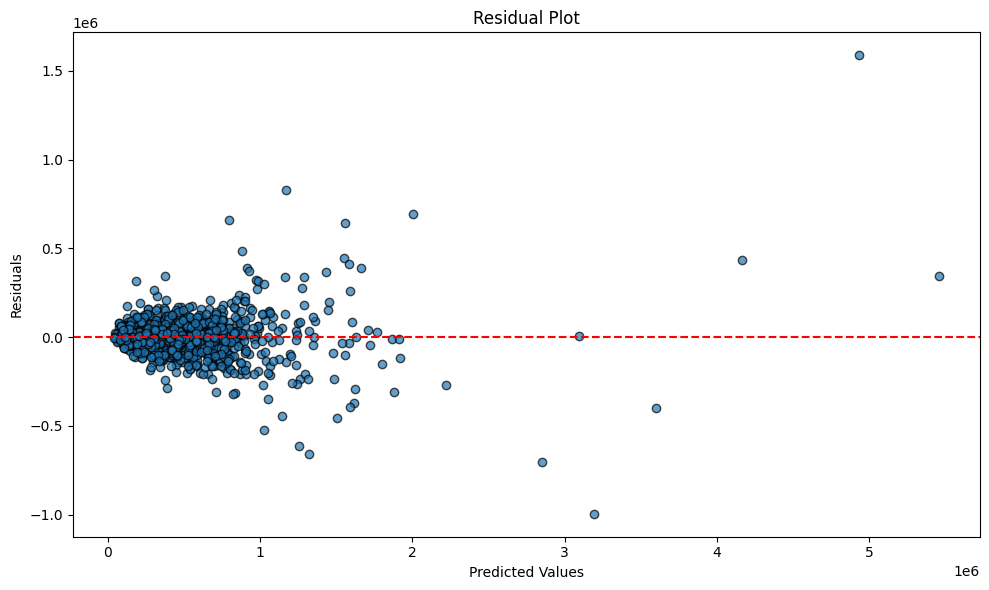

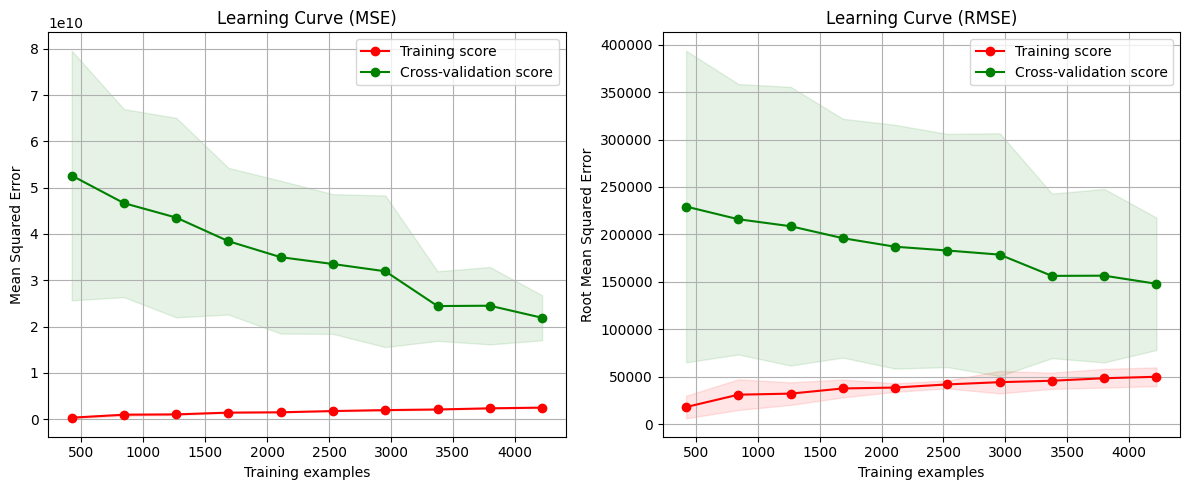

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#Instantiate GradientBoostingRegressor with a fixed random state for reproducibility
gbm = GradientBoostingRegressor(random_state=42)

#Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

#Fit GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

#Get the best model
best_gbm = grid_search.best_estimator_

#Print the best parameters
print("Best parameters:", grid_search.best_params_)

#Make predictions using the best model
y_pred = best_gbm.predict(X_test_scaled)

#Calculate evaluation metrics
gb_mae = mean_absolute_error(Y_test, y_pred)
gb_mse = mean_squared_error(Y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(Y_test, y_pred)

#Print the results
print(f"Mean Absolute Error: {gb_mae}")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"R-squared: {gb_r2}")

#Cross-validation for the best model
#The scoring metric is negative MSE, so i will negate it in the next step to get actual MSE
cv_scores = cross_val_score(best_gbm, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores #Converting scores to MSE by negating
cv_rmse = np.sqrt(cv_mse) #Calculating RMSE by taking square root of MSE

print("\nCross-validation results:")
print("MSE:")
print(f"Scores: {cv_mse}")
print(f"Mean: {cv_mse.mean():.4f} (+/- {cv_mse.std() * 2:.4f})")

print("\nRMSE:")
print(f"Scores: {cv_rmse}")
print(f"Mean: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

#Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#Add Residual Plot
residuals = Y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

#Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_gbm, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

#Calculate MSE
train_mse_mean = -train_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
test_mse_mean = -test_scores.mean(axis=1)
test_mse_std = test_scores.std(axis=1)

#Calculate RMSE
train_rmse_mean = np.sqrt(train_mse_mean)
train_rmse_std = np.sqrt(train_mse_std)
test_rmse_mean = np.sqrt(test_mse_mean)
test_rmse_std = np.sqrt(test_mse_std)

#Plot
plt.figure(figsize=(12, 5))

#MSE plot
plt.subplot(1, 2, 1)
plt.title('Learning Curve (MSE)')
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.fill_between(train_sizes, train_mse_mean - train_mse_std, train_mse_mean + train_mse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mse_mean - test_mse_std, test_mse_mean + test_mse_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mse_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

#RMSE plot
plt.subplot(1, 2, 2)
plt.title('Learning Curve (RMSE)')
plt.xlabel("Training examples")
plt.ylabel("Root Mean Squared Error")
plt.grid()
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_rmse_mean - test_rmse_std, test_rmse_mean + test_rmse_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_rmse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_rmse_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# **Neural Network**

Epoch 1/100
132/132 [==============================] - 2s 4ms/step - loss: 463320940544.0000 - val_loss: 284289695744.0000
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 208280027136.0000 - val_loss: 131205881856.0000
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 165199937536.0000 - val_loss: 103985774592.0000
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 137697820672.0000 - val_loss: 82274107392.0000
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 119891042304.0000 - val_loss: 71708966912.0000
Epoch 6/100
132/132 [==============================] - 0s 3ms/step - loss: 110771077120.0000 - val_loss: 65620140032.0000
Epoch 7/100
132/132 [==============================] - 0s 3ms/step - loss: 104568782848.0000 - val_loss: 61639221248.0000
Epoch 8/100
132/132 [==============================] - 0s 3ms/step - loss: 99769999360.0000 - val_loss: 59106471936.0000
Epoch 9/100
132/132 [=

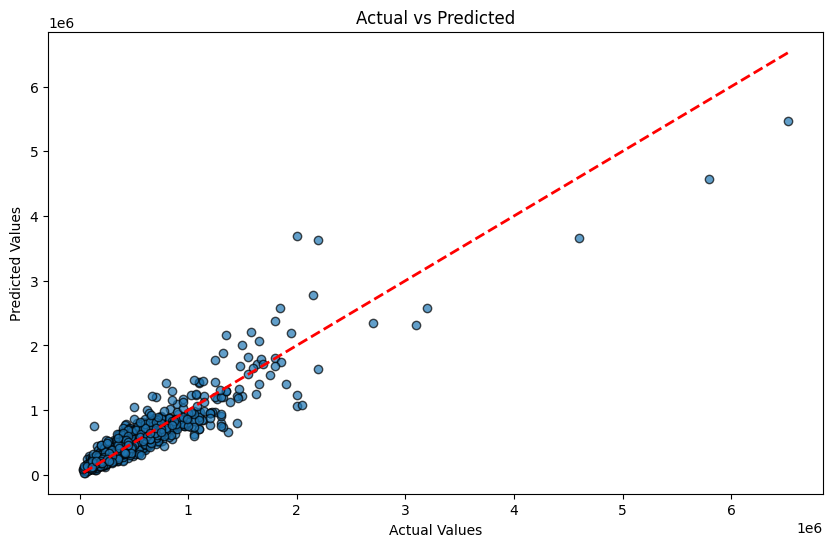

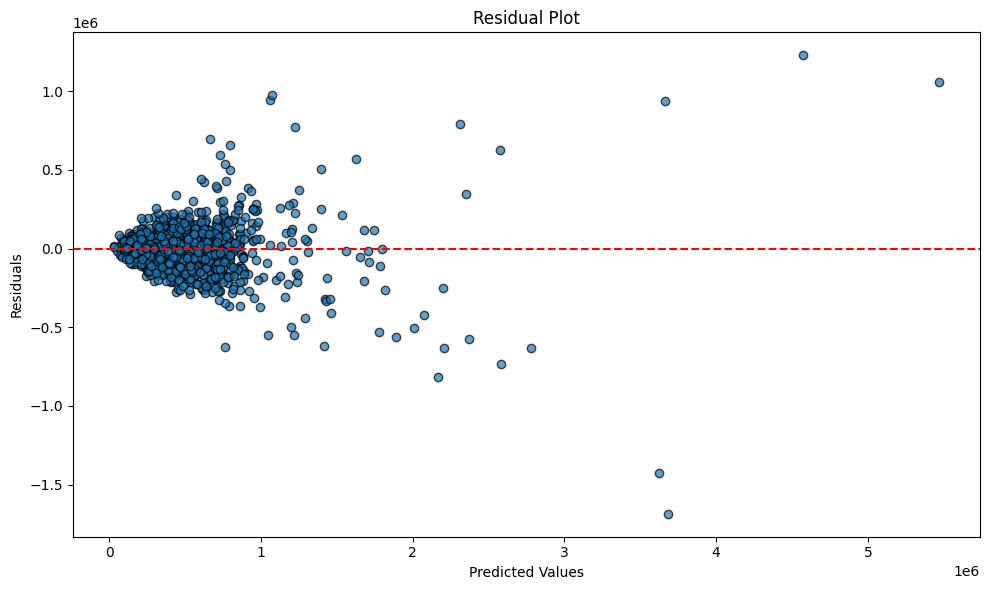

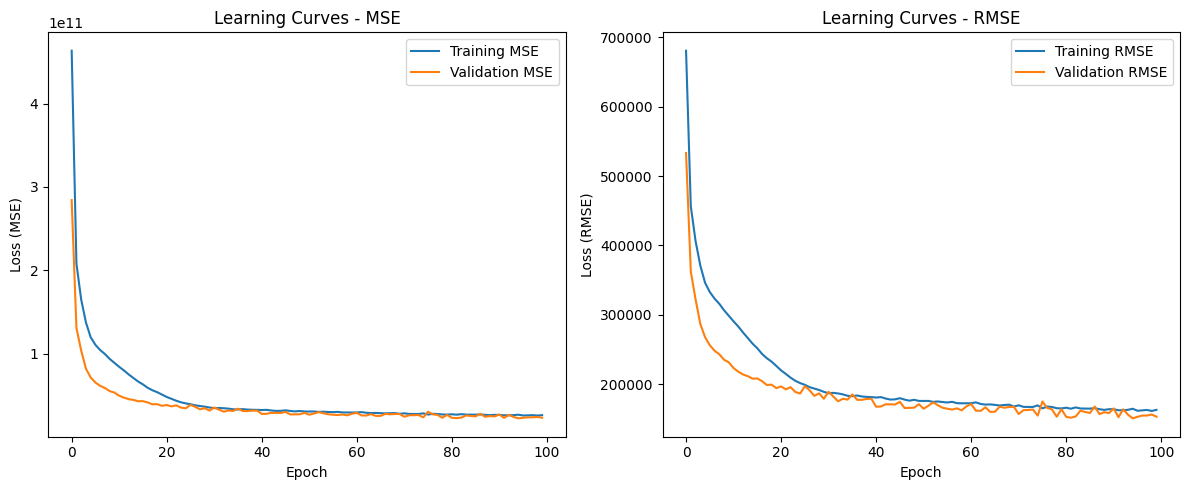

In [ ]:
from tensorflow import keras
from keras import layers,models
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_scaled, Y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Test MSE: {loss}")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
nn_mae = mean_absolute_error(Y_test, y_pred)
nn_mse = mean_squared_error(Y_test, y_pred)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(Y_test, y_pred)

# Print the results
print(f"Mean Absolute Error: {nn_mae}")
print(f"Mean Squared Error: {nn_mse}")
print(f"Root Mean Squared Error: {nn_rmse}")
print(f"R-squared: {nn_r2}")

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Residual plot
plt.figure(figsize=(10, 6))
residuals = Y_test - y_pred.flatten()
plt.scatter(y_pred.flatten(), residuals, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Loss curves
plt.figure(figsize=(12, 5))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Learning Curves - MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# RMSE plot
plt.subplot(1, 2, 2)
train_rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Learning Curves - RMSE')
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Create dataframe with ensemble methods performances
models_en = ['LinearRegression', 'RandomForest', 'GradientBoosting', 'Neural Network']
mae_en = [linear_mae, rfr_mae, gb_mae, nn_mae]
mse_en = [ linear_mse, rfr_mse, gb_mse, nn_mse ]
rmse_en = [linear_rmse, rfr_rmse, gb_rmse, nn_rmse]
r_squared_en = [linear_r2, rfr_r2, gb_r2, nn_r2]

scores_en = pd.DataFrame({'Model': models_en, 'Test_MAE': mae_en, 'Test_MSE': mse_en, 'Test_RMSE': rmse_en, 'Test_R^2': r_squared_en})

<ipython-input-39-93224d6bb94e>:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


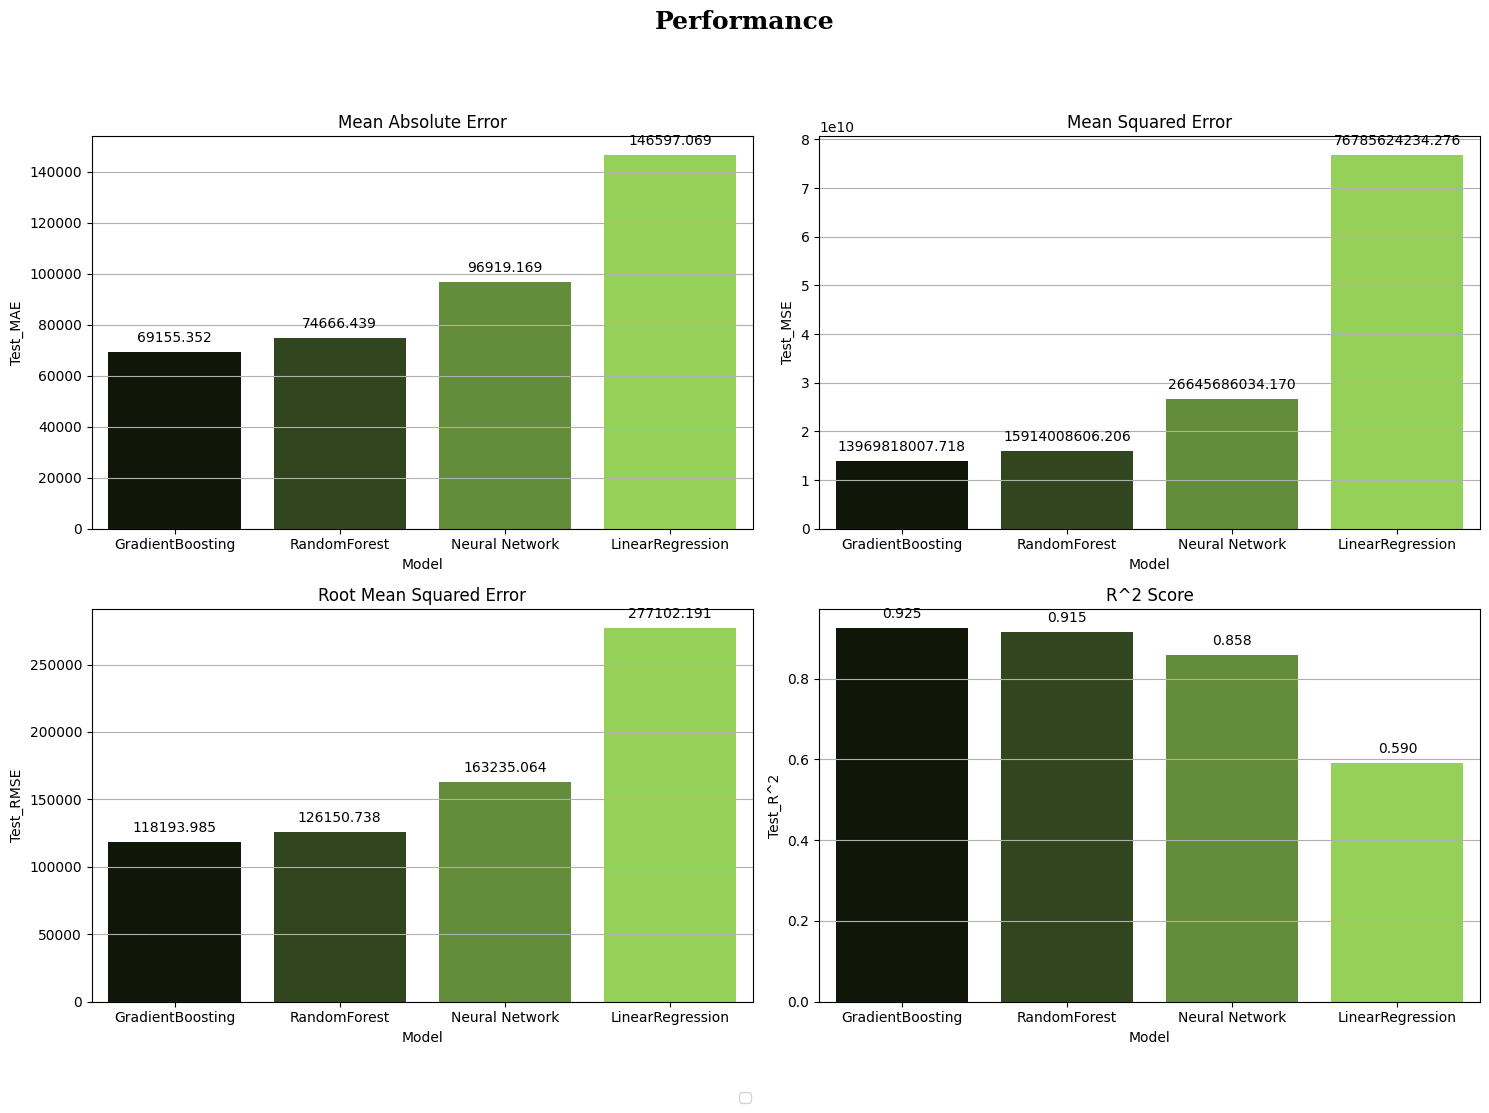

In [ ]:
#Plot performance
colors = ['#101907', '#314c17', '#63992e', '#95e545']
fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)
plt.suptitle("Performance", x=0.5, y=1.05, family='serif', size=18, weight='bold')

axes = axes.flatten()

#Function to add value labels
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.3f}"

        ax.annotate(label, (x_value, y_value), xytext=(0, spacing),
                    textcoords="offset points", ha='center', va='bottom')

#Plot MAE
sns.barplot(ax=axes[0], data=scores_en.sort_values('Test_MAE'), x='Model', y='Test_MAE', hue='Model', palette=colors, legend=False)
axes[0].set_title('Mean Absolute Error')
axes[0].grid(axis='y')
add_value_labels(axes[0])

#Plot MSE
sns.barplot(ax=axes[1], data=scores_en.sort_values('Test_MSE'), x='Model', y='Test_MSE', hue='Model', palette=colors, legend=False)
axes[1].set_title('Mean Squared Error')
axes[1].grid(axis='y')
add_value_labels(axes[1])

#Plot RMSE
sns.barplot(ax=axes[2], data=scores_en.sort_values('Test_RMSE'), x='Model', y='Test_RMSE', hue='Model', palette=colors, legend=False)
axes[2].set_title('Root Mean Squared Error')
axes[2].grid(axis='y')
add_value_labels(axes[2])

#Plot R^2
sns.barplot(ax=axes[3], data=scores_en.sort_values('Test_R^2', ascending=False), x='Model', y='Test_R^2', hue='Model', palette=colors, legend=False)
axes[3].set_title('R^2 Score')
axes[3].grid(axis='y')
add_value_labels(axes[3])

#Add a legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.show()